### PyTorch Workflow
#### What we are going to cover
1. data (prepare and load)
2. build model
3. fitting the model to data (training)
4. making predection and evaluating a model(inference),
5. saving and loading a model
6. putting it all together

In [3]:
import torch
import matplotlib.pyplot as plt
from torch import nn # nn contains all of the pytorch's building blocks for neural networks
torch.__version__

'2.4.1'

## 1. Data (preparing and loading)
Data can be anything .... in machine learning
* Excel spreadsheet
* Images of any kind
* Videos (Youtube and many more)
* Audio like songs or podcasts
* DNA
* Text

#### It has two parts
1. Get data into numerical representation
2. Build a model to learn pattern in that numerical representation

#### To showcase this Let's create a some known data using linea regression formula

In [6]:
# create a known parameters
weight = 0.7
bias = 0.3

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [7]:
len(X), len(y)

(50, 50)

### Splitting the data into training, validation set and test set 
* Training Set - (60 to 80)% (always)
* Validation Set - (10 to 20)% (often)
* Testing Set - (10 to 20)% (always)

In [9]:
# Create a train test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [10]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## 2. Data Visualization

In [71]:
#### function to visualize the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    #""" Plots training data, test data and compare predections. """
    plt.figure(figsize=(10,7))
    
    #plot training data in blue
    plt.scatter(train_data,train_labels, c="b", s=4, label="Training Data")
    #plot test data in green
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        #plot the predections in red
        plt.scatter(test_data, predictions, c="r", s=4, label="Predections")
        
    #show the legend
    plt.legend(prop={"size": 14});

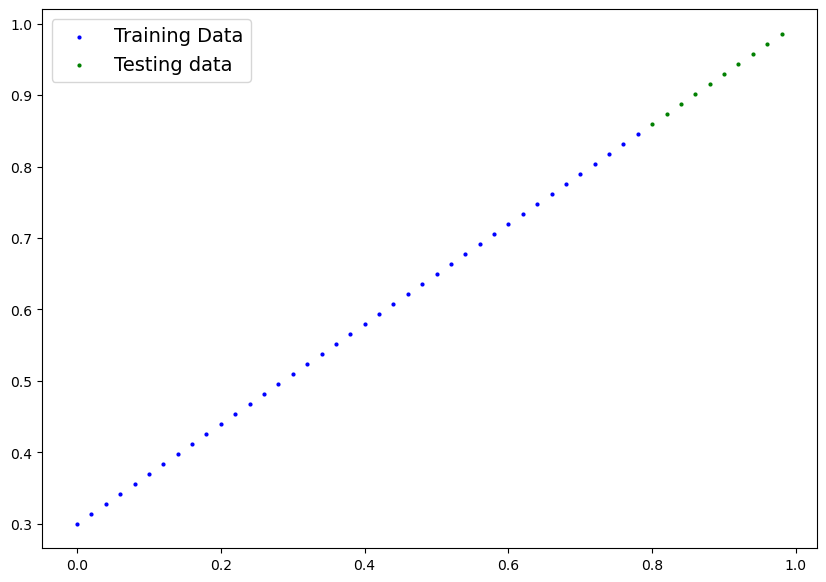

In [73]:
plot_predictions();

### 2.Building the pytorch model

In [48]:
# Creating a linear Regression Model class
from torch import nn
class LinearRegressionModel(nn.Module): #<- almost everything in PyTorch is a nn.module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float),
                                    requires_grad=True)
        self.bias = nn.Parameter(torch.rand(1,
                                           dtype=torch.float),
                                 requires_grad=True)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [50]:
# Set manual seed since nn.parameter are randomly initialized
torch.manual_seed(42)

#create the instance os the model
model_0 = LinearRegressionModel()

#check the parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [52]:
# We can also get the state (What the model contains)
# Using state_dict() method

#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3904]))])

### Making predections using torch.inference_mode()
Because our model starts with random values, it'll have poor predective power

In [54]:
# Make predections with model
with torch.inference_mode():
    y_preds = model_0(X_test)

### Let's Check predections

In [63]:
print(f"Number of testing samples: {len(X_test)}")
print(f"Number of predections made: {len(y_preds)}")
print(f"Predected values:\n{y_preds}")

Number of testing samples: 10
Number of predections made: 10
Predected values:
tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])


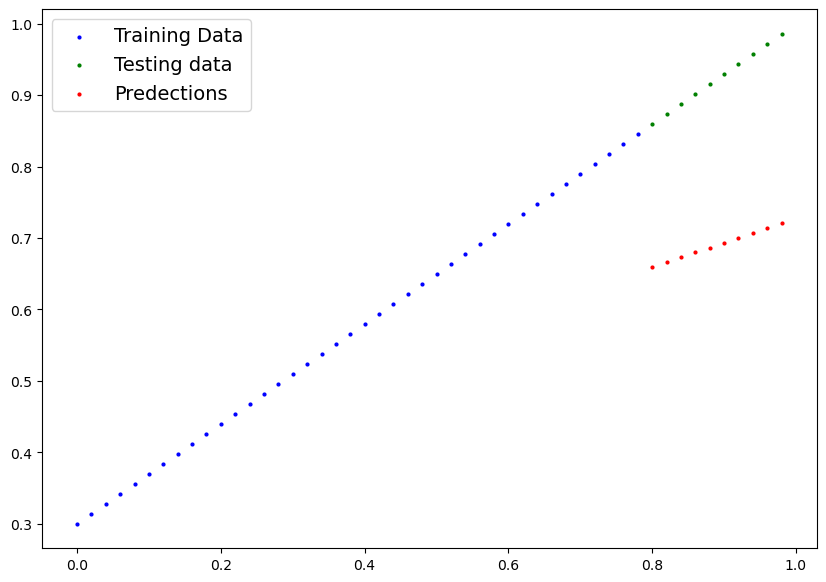

In [75]:
plot_predictions(predictions=y_preds)

## 3. Train Model
Right now this model is just guessing randomly
To fix that, we can update its internal parameters, the weights and bias values we set randomly using nn.parameters() and torch.rand() to be something that better represents

We already know the value of parameters but let's see can the model figure out that value

### Creating a loss function and optimizer in PyTorch
For our model to update its parameters on its own, we'll need to add a few more things to out receipe and they are
* Loss Function
* Optimizer

### Choosing the loss function and optimizer
Since we are predecting a number, so lets use MAE(Mean Absolute Error) which is under **torch.nn.L1Loss()** in PyTorch as our loss function

We'll use SGD(Stochastic Gradient Descent) as our optimizer which is under **torch.optim.SGD(params, lr)** where:
* params is the target model parameters you'd like to optimize(e.g. weights and bias)
* lr is the **learning rate** you'd  like the optimizer to update the parameters 

In [89]:
# create the loss function
loss_fn = nn.L1Loss() #MAE 

#create optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)